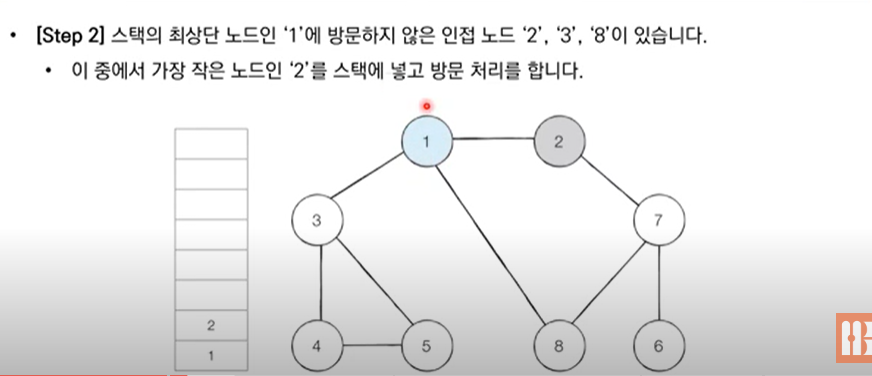

In [1]:
'''
step 1) 1을 스택에 삽입하고 방문 처리     [1
step 2) 1의 인접노드인 2 3 8중 가장 작은 2를 스택에 넣고 방문 처리  [1,2
step 3) 스택의 최상단 노드인 2에서 방문하지 않은 인접노드 7을 스택에 넣고 방문처리 [1,2,7 
step 4) 스택의 최상단 노드인 7에서 방문하지 않은 인접노드 6 , 8 중 가장 작은 노드인 6을 방문하여 스택에 삽입
        [1,2,7,6     
step 5) 스택의 최상단 노드인 6에서 방문하지 않은 인접 노드가 없으니 스택에서 6을 꺼낸다! [1 2 7
step 6) 스택의 최상단 노드인 7에서 방문하지 않은 인접노드 8을 스택에 넣고 삽입 처리!! [1 2 7 8

최종 1 2 7 6 8 3 4 5
'''

def dfs(graph, v, visited):
  # 현재 노드를 방문처리
    visited[v]=True
    print(v,end=' ')
    
##현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph,i,visited)

# 각 노드가 연결된 정보를 표현(0번 인덱스는 무시)
graph=[
  [],
  [2,3,8],
  [1,7],
  [1,4,5],
  [3,5],
  [3,4],
  [7],
  [2,6,8],
  [1,7]
]
# 각 노드가 방문한 정보를 표현
visited=[False]*9

dfs(graph, 1, visited)
# 1 2 7 6 8 3 4 5

1 2 7 6 8 3 4 5 

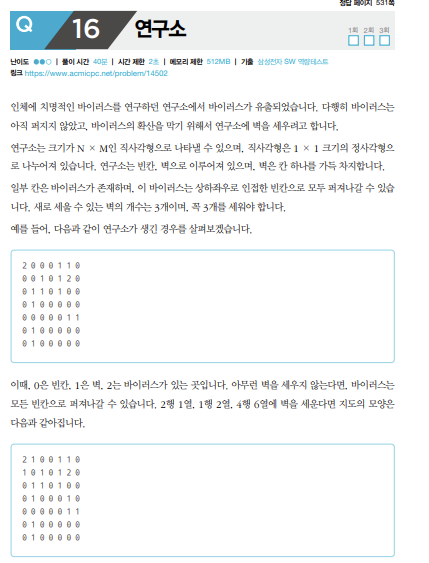

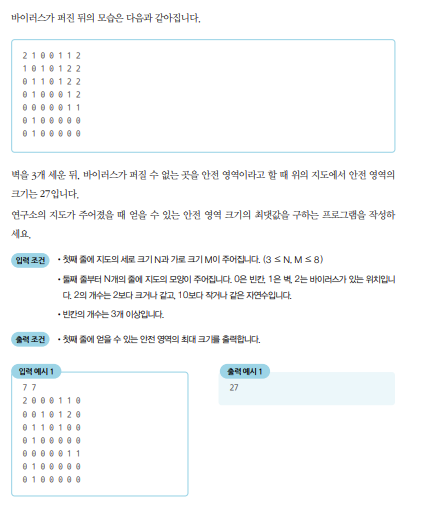

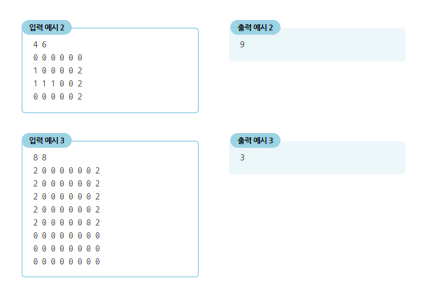

In [4]:
n, m = map(int, input().split())
data = [] # 초기 맵 리스트
temp = [[0] * m for _ in range(n)] # 벽을 설치한 뒤의 맵 리스트
for _ in range(n):
    data.append(list(map(int, input().split())))
    
data

2 3
1 1
1 2 3


[[1, 1], [1, 2, 3]]

In [ ]:
'''
벽은 3개만 세울 수 있다!
DFS 아이디어를 사용하기는 해야 할 것 같은데
아 쓰벅 이거 어떻게 해야하지
ㅋㅋㅋㅋㅋㅋㅋ

'''

## 답지VER

In [1]:
# BOJ에서는 [언어]를 PyPy3로 설정하여 제출해주세요.

n, m = map(int, input().split())
data = [] # 초기 맵 리스트
temp = [[0] * m for _ in range(n)] # 벽을 설치한 뒤의 맵 리스트

for _ in range(n):
    data.append(list(map(int, input().split())))

# 4가지 이동 방향에 대한 리스트
dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

result = 0

# 깊이 우선 탐색(DFS)을 이용해 각 바이러스가 사방으로 퍼지도록 하기
def virus(x, y):
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        # 상, 하, 좌, 우 중에서 바이러스가 퍼질 수 있는 경우
        if nx >= 0 and nx < n and ny >= 0 and ny < m:
            if temp[nx][ny] == 0:
                # 해당 위치에 바이러스 배치하고, 다시 재귀적으로 수행
                temp[nx][ny] = 2
                virus(nx, ny)

# 현재 맵에서 안전 영역의 크기 계산하는 메서드
def get_score():
    score = 0
    for i in range(n):
        for j in range(m):
            if temp[i][j] == 0:
                score += 1
    return score

# 깊이 우선 탐색(DFS)을 이용해 울타리를 설치하면서, 매 번 안전 영역의 크기 계산
def dfs(count):
    global result
    # 울타리가 3개 설치된 경우
    if count == 3:
        for i in range(n):
            for j in range(m):
                temp[i][j] = data[i][j]
        # 각 바이러스의 위치에서 전파 진행
        for i in range(n):
            for j in range(m):
                if temp[i][j] == 2:
                    virus(i, j)
        # 안전 영역의 최대값 계산
        result = max(result, get_score())
        return
    # 빈 공간에 울타리를 설치
    for i in range(n):
        for j in range(m):
            if data[i][j] == 0:
                data[i][j] = 1
                count += 1
                dfs(count)
                data[i][j] = 0
                count -= 1

dfs(0)
print(result)
 


4 6
0 0 0 0 0 0
1 0 0 0 0 2
1 1 1 0 0 2
0 0 0 0 0 2
9
